In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table

In [2]:

t = Table.read('Tgas200_Wright2003_2MASS_FinCat_out.vot', format='votable')
print(t.colnames)


Source = t["Source"]
Gmag = t["X.Gmag."]
Vmag = t["VTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
Qfl = t["Qfl"]
Bmag = t['BTmag']





['col1', 'angDist', 'd_arcsec', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


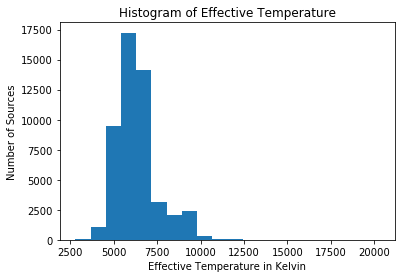

50093


In [6]:
temps = [2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500]
test = []
#for i in range(0,len(Teff)):
#    if(Teff[i] >= 5000 & Teff[i] <= 5500):
#        test.append(Teff[i])
#        print(test[i])

bins = 20
plt.xlabel("Effective Temperature in Kelvin")
plt.ylabel("Number of Sources")
plt.title("Histogram of Effective Temperature")
pltemp=plt.hist(Teff,bins)
plt.show()
print(len(Teff))

In [4]:
SpType = t['SpType']
Sp = [0.0]*len(SpType)
SpV = []
SPIII = []
temperature = t['Teff']
for i in range(0,len(SpType)):
    if(SpType.mask[i]==False):
        Spc = SpType[i].decode()
        if(len(Spc) > 2):
            for c in range(0,len(Spc)):
                if(Spc[c] == 'V'):
                    Sp[i] = Sp[i] + 5
                if(Sp[c] == 'I'):
                    Sp[i] = Sp[i] + 1
                if(Sp[c] == '+'):
                    Sp[i] = -30
        else:
            Sp[i] = 5.1
        
        if(Sp[i] == 6):
            Sp[i] = 4
        if(Sp[i] > 5.2):
            Sp[i] = -30
        if(Sp[i] == 11):
            Sp[i] = 4.5
        if(Sp[i] == 9):
            Sp[i] = 3.5
            
for i in range(0,len(Sp)):
    if(Sp[i] == 5.0):
        SpV.append(Sp[i])
    if(Sp[i] ==3 ):
        SpIII.append(Sp[i])
print(len(SpType))        
print(len(Sp))
print(len(SpV))
print(SpV[0:30])

50093
50093
22514
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [3]:
SpType = t["SpType"]
SpTypeN = [0.0]*len(SpType)
SpV = []
for i in range(0,len(SpType)):
    if(SpType.mask[i] == False):
        SpT = SpType[i].decode()
        if(len(SpT) > 2):
            for j in range(0,len(SpT)):
                if(SpT[j] == 'I'):
                    SpTypeN[i] = SpTypeN[i] + 1
                if(SpT[j] == 'V'):
                    SpTypeN[i] = SpTypeN[i] + 5
                if(SpT[j] == '+'):
                    SpTypeN[i] = -20.
                
        else:
            SpTypeN[i] = 5.1
        
        if(SpTypeN[i] == 6):
            SpTypeN[i] = 4.
        if(SpTypeN[i] == 11):
            SpTypeN[i] = 4.5
        if(SpTypeN[i] == 9):
            SpTypeN[i] = 3.5
        if(SpTypeN[i] > 5.2):
            SpTypeN[i] = -30.
print("Finished Luminosity Class Translation")
count = 0
for i in range(0,len(SpTypeN)):
    if(SpTypeN[i] == 5.0):
        SpV.append(SpTypeN[i])
for i in range(0,len(SpType)):
    if(SpTypeN[i] < 0.):
        count = count + 1
test = SpType.compressed()
good = len(test) - count
print("  Number of single Stars: ",good,"  Binaries or Unknown luminosity class: ",count)

Finished Luminosity Class Translation
  Number of single Stars:  49670   Binaries or Unknown luminosity class:  423


In [4]:
para = t['Plx'] 
dist = 1000/para 
AbsGmag = [] 
AbsVmag = [] 
AbsKmag = [] 
AbsHmag = [] 
AbsJmag = [] 
AbsBmag = []

for i in range(len(dist)): 
    
    AbsGmag.append(Gmag[i] + 5 - 5*np.log10(dist[i]))

    AbsVmag.append(Vmag[i] + 5 - 5*np.log10(dist[i]))

    AbsKmag.append(Kmag[i] + 5 - 5*np.log10(dist[i]))

    AbsHmag.append(Hmag[i] + 5 - 5*np.log10(dist[i]))

    AbsJmag.append(Jmag[i] + 5 - 5*np.log10(dist[i]))

    AbsBmag.append(Bmag[i] + 5 - 5*np.log10(dist[i]))
        
print(len(AbsVmag), len(AbsBmag), len(AbsJmag))

50093 50093 50093


In [10]:
Teff = t['Teff']
temps = [4000.0,4500.0,5000.0,5500.0,6000.0,6500.0,7000.0,7500.0,8000.0,8500.0,9000.0,9500.0,10000.0]
EffWave = [445,551,600,1220,1630,2190]

totalB = []
totalV = []
totalK = []
totalH = []
totalJ = []
totalG = []
totalTemp = []
TotalMags = np.zeros((6,13))
for i in temps:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    for j in range(0,len(Teff)):
        if(SpTypeN[j] in SpV):
            if(i <= Teff[j] <= (i+500.0)):
                
                tempRange.append(Teff[j])
                if(Gmag.mask[j] == False): 
                    GmagV.append(AbsGmag[j])
                if(Vmag.mask[j] == False): 
                    VmagV.append(AbsVmag[j])
                if(Kmag.mask[j] == False):     
                    KmagV.append(AbsKmag[j])
                if(Hmag.mask[j] == False): 
                    HmagV.append(AbsHmag[j])
                if(Jmag.mask[j] == False): 
                    JmagV.append(AbsJmag[j])
                if(Bmag.mask[j] == False): 
                    BmagV.append(AbsBmag[j])
                sources = sources + 1
    MeanTemp = np.mean(tempRange)
    MinTemp = np.min(tempRange)
    MaxTemp = np.max(tempRange)
    TempStd = np.std(tempRange)     
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    totalTemp.append(MeanTemp)
    totalB.append(MeanBmag)
    totalG.append(MeanGmag)
    totalV.append(MeanVmag)
    totalH.append(MeanHmag)
    totalK.append(MeanKmag)
    totalJ.append(MeanJmag)
    GmagStd = np.std(GmagV)
    HmagStd = np.std(HmagV)
    VmagStd = np.std(VmagV)
    JmagStd = np.std(JmagV)
    KmagStd = np.std(KmagV)
    BmagStd = np.std(BmagV)
    Mags = [MeanBmag,MeanVmag,MeanGmag,MeanJmag,MeanHmag,MeanKmag]
    print(i,' Range Complete. Hiding all ouput.')
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
#     plt.xlabel('Effective Wavelength')
#     plt.ylabel('Absolute Magnitude')
#     plt.title('Absolute Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
#     plt.scatter(EffWave,Mags)
#     plt.gca().invert_yaxis()
#     #plt.errorbar(EffWave,Mags,[BmagStd,VmagStd,GmagStd,JmagStd,HmagStd,KmagStd])
#     plt.show()
    
#     print('Number of Stars: ', sources)
#     print('Average Effective Temp in K: ', MeanTemp)
#     print('Standard Deviation of Temp in K: ', TempStd)
#     print('Min Temp: ', MinTemp, '  Max Temp: ', MaxTemp)
#     print('Average Bmag: ', MeanBmag)
#     print('Average Vmag: ', MeanVmag)
#     print('Average Gmag: ', MeanGmag)
#     print('average Hmag: ', MeanHmag)
#     print('average Jmag: ', MeanJmag)
#     print('average Kmag: ', MeanKmag)
    #print('Standard Deviation of Gmag: ',GmagStd)
    #print(MeanVmag)
        

4000.0  Range Complete. Hiding all ouput.
4500.0  Range Complete. Hiding all ouput.
5000.0  Range Complete. Hiding all ouput.
5500.0  Range Complete. Hiding all ouput.
6000.0  Range Complete. Hiding all ouput.
6500.0  Range Complete. Hiding all ouput.
7000.0  Range Complete. Hiding all ouput.
7500.0  Range Complete. Hiding all ouput.
8000.0  Range Complete. Hiding all ouput.
8500.0  Range Complete. Hiding all ouput.
9000.0  Range Complete. Hiding all ouput.
9500.0  Range Complete. Hiding all ouput.
10000.0  Range Complete. Hiding all ouput.


Mean Effective Temperature in G-J Range 0.0-0.5:  9385.89085072 
Number of Sources:  623 

Mean Effective Temperature in G-J Range 0.5-1.2:  6223.22580645 
Number of Sources:  465 

     G-J [0.0-0.5]                           G-J [0.5-1.2]

    RA                 DEC         DIST                 RA                DEC         DIST
271.16212372     -41.97017167     172.712          238.30027959     -7.65534154     145.773
93.2465281     -28.46361115     150.15          77.88766668     -3.59936093     182.482
48.75113318     -26.10046057     151.057          234.06460186     -7.71727492     174.52
45.2229946     52.35204252     147.71          280.46668795     -39.67516865     119.332
273.55307709     -39.94978747     191.205          231.77763686     -40.37868703     186.567
51.54522928     48.38403538     170.358          231.54871677     -38.15709231     184.502
52.22355732     49.07031609     198.02          76.49528868     -68.41664384     106.496
166.63697272     -21.16687764     1

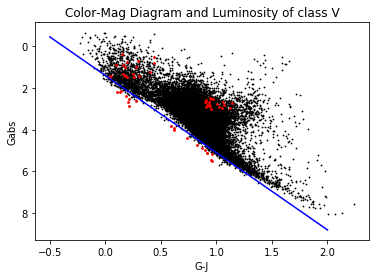

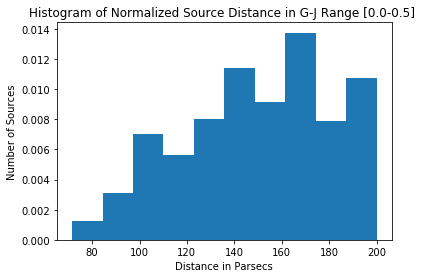

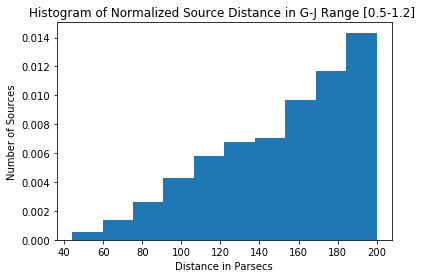

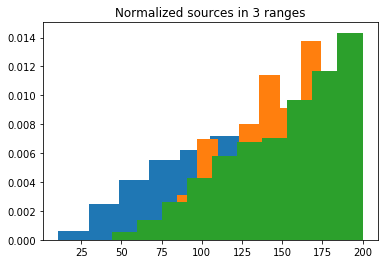

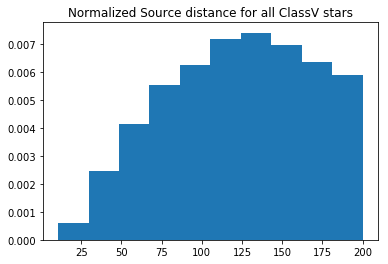

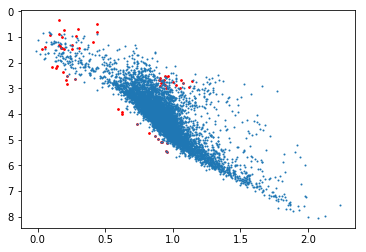

There are:  19641 Stars being used here


In [6]:
Teff = t['Teff']
RA = t['RAJ2000']
DEC = t['DEJ2000']
Gabs = []
GJabs = []
# First Region represents the G-J range of [0.0-0.5]
# Second Region represents the G-J range of [0.5-1.2]
# Each RA and DEC arrays correspond to each region based on the _"first" or _"second" notation
RA_first = []
DEC_first = []
temp_first = []
RA_second = []
DEC_second = []
temp_second = []
GJ1st = []
G1st = []
GJ2nd = []
G2nd = []
dist_1st = []
dist_2nd = []
# Arrays for sources below Main Sequence Line
RA_below = []
DEC_below = []
G_below = []
GJ_below = []
dist_below = []
temp_below = []
# Defines a rough estimate of the bottom of the Main Sequence Line. 
xrange = np.linspace(-0.5,2.0)
yvalue = xrange*3.7 +1.4
plt.plot(xrange,yvalue,c='b')
count = 0
all_dist = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            count = count + 1
            Gvalue = AbsGmag[i]
            GJvalue = AbsGmag[i]-AbsJmag[i]
            Gabs.append(Gvalue)
            GJabs.append(GJvalue)
            all_dist.append(dist[i])
            if(GJvalue >= 0.0 and GJvalue < 0.5):
                if(Gvalue >= 0.0 and Gvalue <= 1.5):
                    RA_first.append(RA[i])
                    DEC_first.append(DEC[i])
                    temp_first.append(Teff[i])
                    G1st.append(Gvalue)
                    GJ1st.append(GJvalue)
                    dist_1st.append(dist[i])
            if(0.9 <= GJvalue <= 1.2):
                if(2.5 <= Gvalue <= 3.0):
                    RA_second.append(RA[i])
                    DEC_second.append(DEC[i])
                    temp_second.append(Teff[i])
                    G2nd.append(Gvalue)
                    GJ2nd.append(GJvalue)
                    dist_2nd.append(dist[i])
            if(0.1 <= GJvalue <= 1.0):
                if(Gvalue > GJvalue*3.7+1.6):
                    RA_below.append(RA[i])
                    DEC_below.append(DEC[i])
                    G_below.append(Gvalue)
                    GJ_below.append(GJvalue)
                    dist_below.append(dist[i])
                    temp_below.append(Teff[i])
#              if(0.2 <= GJvalue <= 0.5):
#                  if(Gvalue/GJvalue < 3.7):
#                      RA_below.append(RA[i])
#                      DEC_below.append(DEC[i])
#                      G_below.append(Gvalue)
#                      GJ_below.append(GJvalue)
#                      dist_below.append(dist[i])
#                      temp_below.append(Teff[i])
                
plt.title('Color-Mag Diagram and Luminosity of class V')
plt.xlabel('G-J')
plt.ylabel('Gabs')
plt.gca().invert_yaxis()
plt.scatter(GJabs,Gabs,s=0.6,c='k')
meanTempFirst = np.mean(temp_first)
meanTempSecond = np.mean(temp_second)

Gabs100 = []
GJabs100 = []


print('Mean Effective Temperature in G-J Range 0.0-0.5: ', meanTempFirst, '\nNumber of Sources: ', len(RA_first), '\n')


print('Mean Effective Temperature in G-J Range 0.5-1.2: ', meanTempSecond, '\nNumber of Sources: ', len(RA_second), '\n')
print('     G-J [0.0-0.5]                           G-J [0.5-1.2]\n')
print('    RA                 DEC         DIST                 RA                DEC         DIST')

G_1st = []
GJ_1st = []
G_2nd = []
GJ_2nd = []
for j in range(0,20):
    
    print(RA_first[j], '   ',DEC_first[j], '   ',dist_1st[j], '        ',RA_second[j], '   ',DEC_second[j], '   ',dist_2nd[j])
    G_1st.append(G1st[j])
    GJ_1st.append(GJ1st[j])
    G_2nd.append(G2nd[j])
    GJ_2nd.append(GJ2nd[j])

print('\n \nAll Source below Theoretical Main Sequence Line (blue)\n')
print('    RA                 DEC         DIST')
for j in range(0,len(RA_below)):
    
    print(RA_below[j], '   ',DEC_below[j], '   ',dist_below[j])
#     G_1st.append(G1st[j])
#     GJ_1st.append(GJ1st[j])
#     G_2nd.append(G2nd[j])
#     GJ_2nd.append(GJ2nd[j])
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')
plt.show()
    
plt.title('Histogram of Normalized Source Distance in G-J Range [0.0-0.5] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist1st=plt.hist(dist_1st,normed=True)
plt.show()
plt.title('Histogram of Normalized Source Distance in G-J Range [0.5-1.2] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist2nd=plt.hist(dist_2nd,normed=True)
plt.show()
plt.title('Normalized sources in 3 ranges')
histbelow=plt.hist(all_dist,normed=True)
hist1st=plt.hist(dist_1st,normed=True)
plt.hist(dist_2nd,normed=True)
#plt.legend('Class V','1st Region','2nd Region')
plt.show()
plt.title('Normalized Source distance for all ClassV stars')
plt.hist(all_dist,normed=True)
plt.show()

for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(dist[i] < 100):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                Gabs100.append(Gvalue)
                GJabs100.append(GJvalue)

plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')
plt.scatter(GJabs100,Gabs100,s=1.0)
plt.gca().invert_yaxis()
plt.show()
print('There are: ',count, 'Stars being used here')

In [8]:
# Splits all stars into 13 different temperature subgroups. 

Teff = t['Teff']
temps = [4000.0,4500.0,5000.0,5500.0,6000.0,6500.0,7000.0,7500.0,8000.0,8500.0,9000.0,9500.0,10000.0]
totalRelB_temp = ([])
totalRelV_temp = ([])
totalRelK_temp = ([])
totalRelH_temp = ([])
totalRelJ_temp = ([])
totalRelG_temp = ([])
Bstd_temp = []
Vstd_temp = []
Kstd_temp = []
Hstd_temp = []
Jstd_temp = []
Gstd_temp = []
all_diffB_temp = [] 
for i in temps:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    diffB_temp = []
    for j in range(0,len(Teff)):
        if(SpTypeN[j] in SpV):
            if(i <= Teff[j] <= i+500):
                tempRange.append(Teff[j])
                if(Gmag.mask[j] == False):
                    GmagV.append(AbsGmag[j]-AbsGmag[j])
                if(Vmag.mask[j] == False and Gmag.mask[j] == False):
                    VmagV.append(AbsGmag[j]-AbsVmag[j])
                if(Kmag.mask[j] == False and Gmag.mask[j] == False):
                    KmagV.append(AbsGmag[j]-AbsKmag[j])
                if(Hmag.mask[j] == False and Gmag.mask[j] == False):
                    HmagV.append(AbsGmag[j]-AbsHmag[j])
                if(Jmag.mask[j] == False and Gmag.mask[j] == False):
                    JmagV.append(AbsGmag[j]-AbsJmag[j])
                if(Bmag.mask[j] == False and Gmag.mask[j] == False):
                    BmagV.append(AbsGmag[j]-AbsBmag[j])
                    
                sources = sources + 1
    
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    
    Bstd_temp.append(np.nanstd(BmagV))
    Vstd_temp.append(np.nanstd(VmagV))
    Hstd_temp.append(np.nanstd(HmagV))
    Jstd_temp.append(np.nanstd(JmagV))
    Kstd_temp.append(np.nanstd(KmagV))
    Gstd_temp.append(np.nanstd(GmagV))
    totalRelB_temp.append(MeanBmag)
    totalRelG_temp.append(MeanGmag)
    totalRelV_temp.append(MeanVmag)
    totalRelH_temp.append(MeanHmag)
    totalRelK_temp.append(MeanKmag)
    totalRelJ_temp.append(MeanJmag)
    #print(MeanBmag)
    Mags = [MeanBmag,MeanVmag,MeanJmag,MeanHmag,MeanKmag]
    print(i,' - ',i+500,' Range Completed')
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    #plt.xlabel('Effective Wavelength')
#     plt.ylabel('Absolute Magnitude')
#     plt.title('Relative Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
#     plt.scatter(EffWave,Mags)
#     plt.gca().invert_yaxis()
#     plt.show()
print('Finished')

4000.0  -  4500.0  Range Completed
4500.0  -  5000.0  Range Completed
5000.0  -  5500.0  Range Completed
5500.0  -  6000.0  Range Completed
6000.0  -  6500.0  Range Completed
6500.0  -  7000.0  Range Completed
7000.0  -  7500.0  Range Completed
7500.0  -  8000.0  Range Completed
8000.0  -  8500.0  Range Completed
8500.0  -  9000.0  Range Completed
9000.0  -  9500.0  Range Completed
9500.0  -  10000.0  Range Completed
10000.0  -  10500.0  Range Completed
Finished


In [13]:
print((3.25+0.3)/13)

0.27307692307692305
3.0038461538461536e+17


In [11]:
# The following code calculates the Chi Squared for every star based off of the temperature subgroup. 

ChiVal = []

def ChiSq(theory,data,Uncert):
    value = ((theory-data)/Uncert)**(2.0)
    return value
All_Chi_Values = []
Chi_minB = []
Chi_minV = []
Chi_minH = []
Chi_minK = []
Chi_minJ = []
finalB = []
finalV = []
finalJ = []
finalK = []
finalH = []
BestFit_temp = []
for i in range(0,len(Teff)):
    #if(SpTypeN[i] in SpV and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False and Bmag.mask[i] == False):
    Chivalues = []
    ChiB = ([])
    ChiV = ([])
    ChiH = ([])
    ChiK = ([])
    ChiJ = ([])
    ChiB_np = np.array([])
    ChiV_np = np.array([])
    ChiH_np = np.array([])
    ChiK_np = np.array([])
    ChiJ_np = np.array([])
    RedChi = []
    for j in range(len(temps)):

#             if(Gmag.mask[i] == False):
#                 data = (AbsGmag[i]-AbsGmag[i])
#                 Chivalues.append(MeanGmag,data)
        if(Vmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsVmag[i])
            currentV = ChiSq(totalRelV_temp[j],data,Vstd_temp[j])
            
#             ChiV.append([currentV,totalTemp[j]])
#             np.append(ChiV_np,ChiV)
        if(Kmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsKmag[i])
            currentK = ChiSq(totalRelK_temp[j],data,Kstd_temp[j])
#             ChiK.append([currentK,totalTemp[j]])
#             np.append(ChiK_np,ChiK)
        if(Hmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsHmag[i])
            currentH = ChiSq(totalRelH_temp[j],data,Hstd_temp[j])
#             ChiH.append([currentH,totalTemp[j]])
#             np.append(ChiH_np,ChiH)
        if(Jmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsJmag[i])
            currentJ = (ChiSq(totalRelJ_temp[j],data,Jstd_temp[j]))
#             ChiJ.append([currentJ,totalTemp[j]])
#             np.append(ChiJ_np,ChiJ)
        if(Bmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsBmag[i])
            currentB = (ChiSq(totalRelB_temp[j],data,Bstd_temp[j]))
#             ChiB.append([currentB,totalTemp[j]])
#             np.append(ChiB_np,ChiB)
        RedChi.append([(currentV+currentK+currentH+currentJ+currentB)/4,totalTemp[j]])
    RedChi = np.array(RedChi)
    Min = np.min(RedChi[:,0])
    for x in range(len(RedChi)):
        if(Min in RedChi[x]):
            bestTemp = RedChi[x,1]
    BestFit_temp.append([Min,bestTemp])
print('Finished fitting all stars to the ',len(temps), ' templates based off of the temperature subgroups')

Finished fitting all stars to the  13  templates based off of the temperature subgroups


Mean Effective Temperature in G-J Range 0.0-0.5:  9385.89085072 
Number of Sources:  623 

Mean Effective Temperature in G-J Range 0.5-1.2:  6223.22580645 
Number of Sources:  465 

     G-J [0.0-0.5]                           G-J [0.5-1.2]

    RA                 DEC         DIST      ReducedChisq               RA                DEC         DIST      RedChiSQ
271.16212372     -41.97017167     172.712     0.0238899600423          238.30027959     -7.65534154     145.773     0.590442944673
93.2465281     -28.46361115     150.15     0.121010889656          77.88766668     -3.59936093     182.482     1.00746606536
48.75113318     -26.10046057     151.057     0.00791056045547          234.06460186     -7.71727492     174.52     0.270716039915
45.2229946     52.35204252     147.71     27.6892861906          280.46668795     -39.67516865     119.332     0.164043639846
273.55307709     -39.94978747     191.205     0.0120448478935          231.77763686     -40.37868703     186.567     0.172026

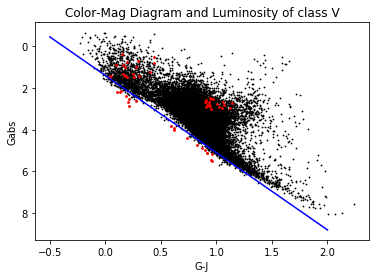

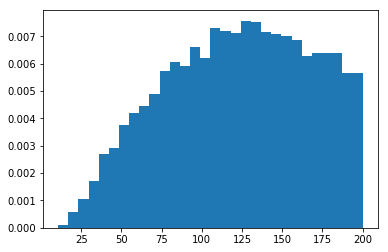

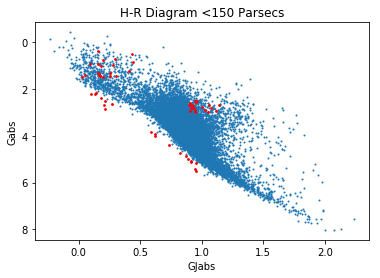

There are:  19641 Stars being used here


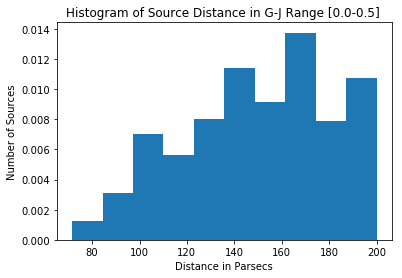

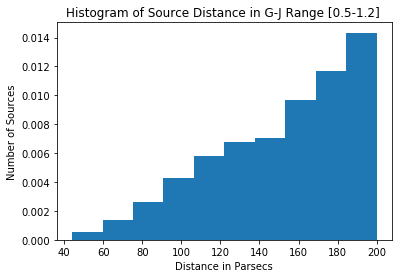

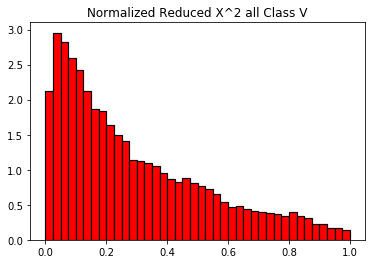

Mean Reduced X^2 value:  0.377443505225 
Standard Deviation:  0.76619266616
Number of Sources:  19641


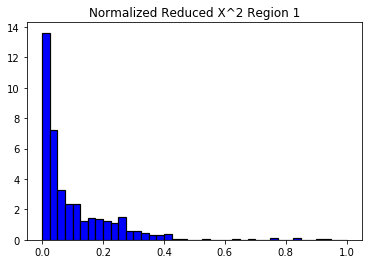

Mean Reduced X^2 value:  0.16363086355 
Standard Deviation:  1.13296567361
Number of Sources:  623 



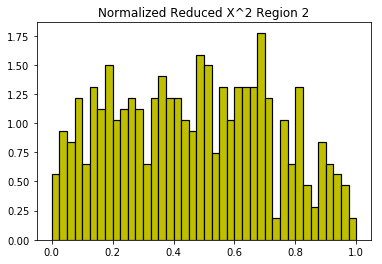

Mean Reduced X^2 value:  0.665072957238 
Standard Deviation:  1.21042669846
Number of Sources:  465 



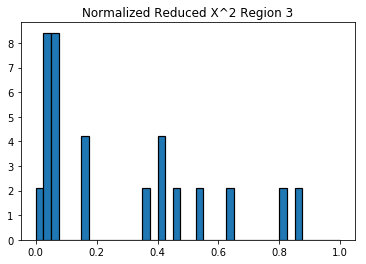

Mean Reduced X^2 value:  0.396550540993 
Standrd Deviation:  0.586163609134
Number of Sources:  20


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


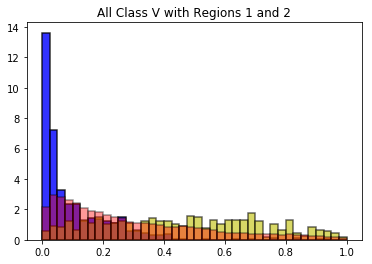

In [17]:
RA = t['RAJ2000']
DEC = t['DEJ2000']
Gabs = []
GJabs = []
# First Region represents the G-J range of [0.0-0.5]
# Second Region represents the G-J range of [0.5-1.2]
# Each RA and DEC arrays correspond to each region based on the _"first" or _"second" notation
RA_first = []
DEC_first = []
temp_first = []
RA_second = []
DEC_second = []
temp_second = []
GJ1st = []
G1st = []
GJ2nd = []
G2nd = []
dist_1st = []
dist_2nd = []
# Arrays for sources below Main Sequence Line
RA_below = []
DEC_below = []
G_below = []
GJ_below = []
dist_below = []
temp_below = []
ClassVChi = []
Chi1st = []
Chi2nd = []
ChiBelow = []
nanChi = []
# Defines a rough estimate of the bottom of the Main Sequence Line. 
xrange = np.linspace(-0.5,2.0)
yvalue = xrange*3.7 +1.4
plt.plot(xrange,yvalue,c='b')
count = 0
all_dists = []
region1count = 0
region2count = 0
totalcount = 0
Tdiff = []
BestFit_temp = np.array(BestFit_temp)
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            count = count + 1
            Gvalue = AbsGmag[i]
            GJvalue = AbsGmag[i]-AbsJmag[i]
            Gabs.append(Gvalue)
            GJabs.append(GJvalue)
            all_dists.append(dist[i])
            totalcount = totalcount + 1
            ClassVChi.append(BestFit_temp[i,0])
            Tdiff.append(np.sqrt((Teff[i]-BestFit_temp[i,1])**2.0))
            if(GJvalue >= 0.0 and GJvalue < 0.5):
                if(Gvalue >= 0.0 and Gvalue <= 1.5):
                    RA_first.append(RA[i])
                    DEC_first.append(DEC[i])
                    temp_first.append(Teff[i])
                    G1st.append(Gvalue)
                    GJ1st.append(GJvalue)
                    dist_1st.append(dist[i])
                    Chi1st.append(BestFit_temp[i,0])
                    if(str(BestFit_temp[i,0]) == 'nan'):
                        print('Got one')
                    region1count = region1count + 1
                    
            if(0.9 <= GJvalue <= 1.2):
                if(2.5 <= Gvalue <= 3.0):
                    RA_second.append(RA[i])
                    DEC_second.append(DEC[i])
                    temp_second.append(Teff[i])
                    G2nd.append(Gvalue)
                    GJ2nd.append(GJvalue)
                    dist_2nd.append(dist[i])
                    Chi2nd.append(BestFit_temp[i,0])
                    region2count = region2count + 1
            if(0.1 <= GJvalue <= 1.0):
                if(Gvalue > GJvalue*3.7+1.6):
                    RA_below.append(RA[i])
                    DEC_below.append(DEC[i])
                    G_below.append(Gvalue)
                    GJ_below.append(GJvalue)
                    dist_below.append(dist[i])
                    temp_below.append(Teff[i])
                    ChiBelow.append(BestFit_temp[i,0])
            #else:
                #nanChi.append(all_RedChi[i])
#              if(0.2 <= GJvalue <= 0.5):
#                  if(Gvalue/GJvalue < 3.7):
#                      RA_below.append(RA[i])
#                      DEC_below.append(DEC[i])
#                      G_below.append(Gvalue)
#                      GJ_below.append(GJvalue)
#                      dist_below.append(dist[i])
#                      temp_below.append(Teff[i])
                
plt.title('Color-Mag Diagram and Luminosity of class V')
plt.xlabel('G-J')
plt.ylabel('Gabs')
plt.gca().invert_yaxis()
plt.scatter(GJabs,Gabs,s=0.6,c='k')
meanTempFirst = np.mean(temp_first)
meanTempSecond = np.mean(temp_second)

Gabs100 = []
GJabs100 = []
GChi = []
GJChi = []

print('Mean Effective Temperature in G-J Range 0.0-0.5: ', meanTempFirst, '\nNumber of Sources: ', len(RA_first), '\n')


print('Mean Effective Temperature in G-J Range 0.5-1.2: ', meanTempSecond, '\nNumber of Sources: ', len(RA_second), '\n')
print('     G-J [0.0-0.5]                           G-J [0.5-1.2]\n')
print('    RA                 DEC         DIST      ReducedChisq               RA                DEC         DIST      RedChiSQ')

G_1st = []
GJ_1st = []
dist1 = []
G_2nd = []
GJ_2nd = []
dist2 = []
for j in range(0,20):
    
    print(RA_first[j], '   ',DEC_first[j], '   ',dist_1st[j],'   ',Chi1st[j], '        ',RA_second[j], '   ',DEC_second[j], '   ',dist_2nd[j],'   ',Chi2nd[j])
    G_1st.append(G1st[j])
    GJ_1st.append(GJ1st[j])
    G_2nd.append(G2nd[j])
    GJ_2nd.append(GJ2nd[j])
    dist1.append(dist_1st[j])
    dist2.append(dist_2nd[j])
distBelow = []
print('\n \nAll Source below Theoretical Main Sequence Line (blue)\n')
print('    RA                 DEC         DIST      Reduced ChiSq')
for j in range(0,len(RA_below)):
    
    print(RA_below[j], '   ',DEC_below[j], '   ',dist_below[j],'   ',ChiBelow[j])
    distBelow.append(dist_below[j])
#     G_1st.append(G1st[j])
#     GJ_1st.append(GJ1st[j])
#     G_2nd.append(G2nd[j])
#     GJ_2nd.append(GJ2nd[j])
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')
plt.show()


classV = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            classV.append(dist[i])
pltall=plt.hist(classV,bins=30,normed=True)
plt.show()
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(dist[i] < 150.0):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                Gabs100.append(Gvalue)
                GJabs100.append(GJvalue)
                
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(BestFit_temp[i,0] < 0.5):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                GChi.append(Gvalue)
                GJChi.append(GJvalue)

# plt.title('Red X^2')
# plt.scatter(GJChi,GChi,s=2.0)
# plt.gca().invert_yaxis()
# plt.show()

plt.title('H-R Diagram <150 Parsecs')
plt.xlabel('GJabs')
plt.ylabel('Gabs')
plt.scatter(GJabs100,Gabs100,s=1.0)
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')

plt.gca().invert_yaxis()
plt.show()
G_Chi = []
GJ_Chi = []
print('There are: ',count, 'Stars being used here')
#print(len(all_RedChi))
averageRedChi = []

# plt.title('H-R With Reduced Chi Sq <10.0')
# plt.xlabel('GJabs')
# plt.ylabel('Gabs')
# plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
# plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
# plt.scatter(GJ_below,G_below,s=3.0,c='r')
# plt.scatter(GJ_Chi,G_Chi,s=2.0)
# plt.gca().invert_yaxis()
# plt.show()

plt.title('Histogram of Source Distance in G-J Range [0.0-0.5] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist1st=plt.hist(dist_1st,normed=True)
plt.show()
plt.title('Histogram of Source Distance in G-J Range [0.5-1.2] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist2nd=plt.hist(dist_2nd,normed=True)
plt.show()

# Reduced X^2 Normalized Histograms
plt.title('Normalized Reduced X^2 all Class V')
plt.hist(ClassVChi,bins=40,range=[0,1],normed=True,color='r',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(ClassVChi),'\nStandard Deviation: ',np.std(ClassVChi))
print('Number of Sources: ', count)
plt.title('Normalized Reduced X^2 Region 1')
plt.hist(Chi1st,bins=40,range=[0,1],normed=True,color='b',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(Chi1st),'\nStandard Deviation: ',np.std(Chi1st))
print('Number of Sources: ', len(RA_first), '\n')
plt.title('Normalized Reduced X^2 Region 2')
plt.hist(Chi2nd,bins=40,range=[0,1],normed=True,color='y',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(Chi2nd),'\nStandard Deviation: ',np.std(Chi2nd))
print('Number of Sources: ', len(RA_second), '\n')
plt.title('Normalized Reduced X^2 Region 3')
plt.hist(ChiBelow,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(ChiBelow),'\nStandrd Deviation: ',np.std(ChiBelow))
print('Number of Sources: ', len(RA_below))
#print(stats.mode(ClassVChi))
plt.title('All Class V with Regions 1 and 2')

plt.hist(Chi1st,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.5,alpha=0.8,color='b')
plt.hist(Chi2nd,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.5,alpha=0.6,color='y')
plt.hist(ClassVChi,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.5,alpha=0.4,color='r')
plt.legend(loc='upper right')
plt.show()

In [31]:
# This Seperates Every Star into color subcategories. The color in question is G-K. 

Teff = t['Teff']
#Mags = [-0.3,-0.05,0.2,0.45,0.7,0.95,1.2,1.45,1.7,1.95,2.2,2.45,2.7,2.95]
Mags = [-0.3,-0.02692307692307694,0.2461538461538461,0.5192307692307692,0.7923076923076922,
        1.0653846153846152,1.3384615384615381,1.6115384615384611,1.8846153846153841,
        2.157692307692307,2.43076923076923,2.703846153846153,2.976923076923076]
totalRelB = ([])
totalRelV = ([])
totalRelK = ([])
totalRelH = ([])
totalRelJ = ([])
totalRelG = ([])
Bstd = []
Vstd = []
Kstd = []
Hstd = []
Jstd = []
Gstd = []
GKvals = []
all_diffB = []
all_diffB_std = []
for i in Mags:
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    diffB = []
    for j in range(0,len(Teff)):
        if(SpTypeN[j] in SpV):
            GK = (AbsGmag[j]-AbsKmag[j])
            GKvals.append(GK)
            if(i <= GK < i + 0.27307692307692305):
            #if(i <= GK < i+0.25):
                #magRange.append(GK)
                if(Gmag.mask[j] == False):
                    GmagV.append(AbsGmag[j]-AbsGmag[j])
                if(Vmag.mask[j] == False and Gmag.mask[j] == False):
                    VmagV.append(AbsGmag[j]-AbsVmag[j])
                if(Kmag.mask[j] == False and Gmag.mask[j] == False):
                    KmagV.append(AbsGmag[j]-AbsKmag[j])
                if(Hmag.mask[j] == False and Gmag.mask[j] == False):
                    HmagV.append(AbsGmag[j]-AbsHmag[j])
                if(Jmag.mask[j] == False and Gmag.mask[j] == False):
                    JmagV.append(AbsGmag[j]-AbsJmag[j])
                if(Bmag.mask[j] == False and Gmag.mask[j] == False):
                    BmagV.append(AbsGmag[j]-AbsBmag[j])
                    diffB.append(AbsGmag[j]-AbsBmag[j])
                sources = sources + 1
    
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    all_diffB.append(np.mean(diffB))
    all_diffB_std.append(np.std(diffB))
    Bstd.append(np.nanstd(BmagV))
    Vstd.append(np.nanstd(VmagV))
    Hstd.append(np.nanstd(HmagV))
    Jstd.append(np.nanstd(JmagV))
    Kstd.append(np.nanstd(KmagV))
    Gstd.append(np.nanstd(GmagV))
    totalRelB.append(MeanBmag)
    totalRelG.append(MeanGmag)
    totalRelV.append(MeanVmag)
    totalRelH.append(MeanHmag)
    totalRelK.append(MeanKmag)
    totalRelJ.append(MeanJmag)
    #print(MeanBmag)
    #Mean_Mags = [MeanBmag,MeanVmag,MeanJmag,MeanHmag,MeanKmag]
    print(i,'-',i+.27307692307692305,' Range Completed')
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    #plt.xlabel('Effective Wavelength')
#     plt.ylabel('Absolute Magnitude')
#     plt.title('Relative Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
#     plt.scatter(EffWave,Mags)
#     plt.gca().invert_yaxis()
#     plt.show()
print('Finished all',len(Mags),'Templates')

-0.3 - -0.02692307692307694  Range Completed
-0.02692307692307694 - 0.2461538461538461  Range Completed
0.2461538461538461 - 0.5192307692307692  Range Completed
0.5192307692307692 - 0.7923076923076922  Range Completed
0.7923076923076922 - 1.0653846153846152  Range Completed
1.0653846153846152 - 1.3384615384615381  Range Completed
1.3384615384615381 - 1.6115384615384611  Range Completed
1.6115384615384611 - 1.8846153846153841  Range Completed
1.8846153846153841 - 2.157692307692307  Range Completed
2.157692307692307 - 2.43076923076923  Range Completed
2.43076923076923 - 2.703846153846153  Range Completed
2.703846153846153 - 2.976923076923076  Range Completed
2.976923076923076 - 3.249999999999999  Range Completed
Finished all 13 Templates


In [33]:
print('Mean STD for Temp subgroups          Mean STD for color subgroups')
print('Bmag: ',np.mean(Bstd_temp),'                   ',np.mean(Bstd))
print('Vmag: ',np.mean(Vstd_temp),'                   ',np.mean(Vstd))
print('Jmag: ',np.mean(Jstd_temp),'                   ',np.mean(Jstd))
print('Hmag: ',np.mean(Hstd_temp),'                   ',np.mean(Hstd))
print('Kmag: ',np.mean(Kstd_temp),'                   ',np.mean(Kstd))
    
print('\nStanDev of STD for Temp subgroups          StanDev of STD for color subgroups')
print('Bmag: ',np.std(Bstd_temp),'                   ',np.std(Bstd))
print('Vmag: ',np.std(Vstd_temp),'                   ',np.std(Vstd))
print('Jmag: ',np.std(Jstd_temp),'                   ',np.std(Jstd))
print('Hmag: ',np.std(Hstd_temp),'                   ',np.std(Hstd))
print('Kmag: ',np.std(Kstd_temp),'                   ',np.std(Kstd))

print('\nMean of G-B: ',np.std(all_diffB),'\nStandard Deviation of G-B: ',np.std(all_diffB_std) )

Mean STD for Temp subgroups          Mean STD for color subgroups
Bmag:  0.164974109599                     0.220722349561
Vmag:  0.0810425476924                     0.105768607559
Jmag:  0.15172873275                     0.0855961813677
Hmag:  0.196984838223                     0.0909650359301
Kmag:  0.213726827407                     0.0724623807518

StanDev of STD for Temp subgroups          StanDev of STD for color subgroups
Bmag:  0.074305855267                     0.22326999183
Vmag:  0.0400539593614                     0.0873549618058
Jmag:  0.0427125307713                     0.0532561369697
Hmag:  0.0559595253291                     0.0424305110411
Kmag:  0.0672740757076                     0.00737106176617

Mean of G-B:  0.845026766401 
Standard Deviation of G-B:  0.22326999183


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


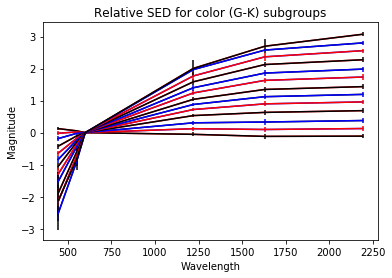

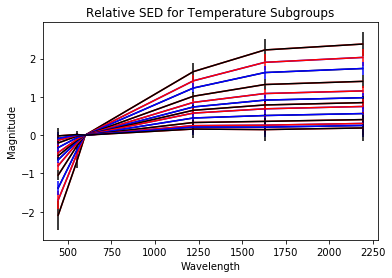

In [28]:
from matplotlib.pyplot import *
## Color (G-K) Subgroups
totalRelMags = np.array([totalRelB,totalRelV,totalRelG,totalRelJ,totalRelH,totalRelK])
totalStdMags = np.array([Bstd,Vstd,Gstd,Jstd,Hstd,Kstd])
fig, ax = plt.subplots()
ax.set_color_cycle(['red', 'black', 'blue'])
#plt.scatter(totalMags[0][0:])
for i in range(len(Mags)):
    plt.plot(EffWave,totalRelMags[:,i])
    plt.errorbar(EffWave,totalRelMags[:,i],totalStdMags[:,i])
    #plt.legend(["Mean Temp: "], [totalTemp[i]])
plt.title('Relative SED for color (G-K) subgroups') 
plt.xlabel('Wavelength')
plt.ylabel('Magnitude')
plt.show()

## For Temperature Subgroups
totalRelMags_temp = np.array([totalRelB_temp,totalRelV_temp,totalRelG_temp,totalRelJ_temp,totalRelH_temp,totalRelK_temp])
totalStdMags_temp = np.array([Bstd_temp,Vstd_temp,Gstd_temp,Jstd_temp,Hstd_temp,Kstd_temp])
fig, ax = plt.subplots()
ax.set_color_cycle(['red', 'black', 'blue'])
for i in range(len(temps)):
    plt.plot(EffWave,totalRelMags_temp[:,i])
    plt.errorbar(EffWave,totalRelMags_temp[:,i],totalStdMags_temp[:,i])
    #plt.legend(["Mean Temp: "], [totalTemp[i]])
plt.title('Relative SED for Temperature Subgroups') 
plt.xlabel('Wavelength')
plt.ylabel('Magnitude')
plt.show()


In [25]:
totalStdMags

array([[ 0.1252051 , -0.02027337, -0.18615804, -0.42360888, -0.64283569,
        -0.83753494, -1.05305651, -1.29597393, -1.52589681, -1.89291151,
        -2.15186961, -2.52355565, -2.13300006],
       [ 0.05666667,  0.02260793, -0.0218154 , -0.1029961 , -0.17739776,
        -0.23545147, -0.2983951 , -0.37638184, -0.44553378, -0.60326548,
        -0.73415219, -0.9003333 , -0.83066686],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.05297435,  0.12342089,  0.30671189,  0.53253439,  0.72160763,
         0.87892444,  1.04010154,  1.23917661,  1.40169395,  1.58733626,
         1.7696739 ,  1.96888892,  2.00533311],
       [-0.11666667,  0.09810613,  0.33152727,  0.63214425,  0.89855062,
         1.12253915,  1.34844418,  1.63150786,  1.85984643,  2.12641283,
         2.36693331,  2.5775556 ,  2.6979998 ],
       [-0.10942308,  0.128368

In [57]:
# Calculates the Chi squared value for every star based off of the color subgroups. 
ChiVal = []

def ChiSq(theory,data,Uncert):
    value = ((theory-data)/Uncert)**(2.0)
    return value
All_Chi_Values = []
Chi_minB = []
Chi_minV = []
Chi_minH = []
Chi_minK = []
Chi_minJ = []
finalB = []
finalV = []
finalJ = []
finalK = []
finalH = []
BestFit = []
for i in range(0,len(Teff)):
    #if(SpTypeN[i] in SpV and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False and Bmag.mask[i] == False):
    Chivalues = []
    ChiB = ([])
    ChiV = ([])
    ChiH = ([])
    ChiK = ([])
    ChiJ = ([])
    ChiB_np = np.array([])
    ChiV_np = np.array([])
    ChiH_np = np.array([])
    ChiK_np = np.array([])
    ChiJ_np = np.array([])
    RedChi = []
    for j in range(len(Mags)):

#             if(Gmag.mask[i] == False):
#                 data = (AbsGmag[i]-AbsGmag[i])
#                 Chivalues.append(MeanGmag,data)
        if(Vmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsVmag[i])
            currentV = ChiSq(totalRelV[j],data,Vstd[j])
            
#             ChiV.append([currentV,totalTemp[j]])
#             np.append(ChiV_np,ChiV)
        if(Kmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsKmag[i])
            currentK = ChiSq(totalRelK[j],data,Kstd[j])
#             ChiK.append([currentK,totalTemp[j]])
#             np.append(ChiK_np,ChiK)
        if(Hmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsHmag[i])
            currentH = ChiSq(totalRelH[j],data,Hstd[j])
#             ChiH.append([currentH,totalTemp[j]])
#             np.append(ChiH_np,ChiH)
        if(Jmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsJmag[i])
            currentJ = (ChiSq(totalRelJ[j],data,Jstd[j]))
#             ChiJ.append([currentJ,totalTemp[j]])
#             np.append(ChiJ_np,ChiJ)
        if(Bmag.mask[i] == False and Gmag.mask[i] == False):
            data = (AbsGmag[i]-AbsBmag[i])
            currentB = (ChiSq(totalRelB[j],data,Bstd[j]))
#             ChiB.append([currentB,totalTemp[j]])
#             np.append(ChiB_np,ChiB)
        RedChi.append([(currentV+currentK+currentH+currentJ+currentB)/4,totalRelK[j]])
    RedChi = np.array(RedChi)
    Min = np.min(RedChi[:,0])
    for x in range(len(RedChi)):
        if(Min in RedChi[x]):
            bestMag = RedChi[x,1]
    BestFit.append([Min,bestMag])
    #print(len(ChiV),len(ChiH))
    #InferredTemp = []
#     ChiV_np = np.array(ChiV)
#     ChiH_np = np.array(ChiH)
#     ChiJ_np = np.array(ChiJ)
#     ChiK_np = np.array(ChiK)
#     ChiB_np = np.array(ChiB)
    
#     if(len(ChiB) == 0):
#         finalB.append('nan')
#     else:
#          #Chi_minB.append(np.min(ChiB_np[:,0]))
#         for x in range(0,len(ChiB_np)):
#              if(np.min(ChiB_np[:,0]) in ChiB_np[x]):
#                     finalB.append(ChiB_np[x])
    
#     if(len(ChiV) == 0):
#         finalV.append('nan')
#     else:
#         for x in range(0,len(ChiV_np)):
#              if(np.min(ChiV_np[:,0]) in ChiV_np[x]):
#                     finalV.append(ChiV_np[x])
#     if(len(ChiH) == 0):
#         finalH.append('nan')
#     else:
#         for x in range(0,len(ChiH_np)):
#              if(np.min(ChiH_np[:,0]) in ChiH_np[x]):
#                     finalH.append(ChiH_np[x])
#     if(len(ChiJ) == 0):
#         finalJ.append('nan')
#     else:
#         for x in range(0,len(ChiJ_np)):
#              if(np.min(ChiJ_np[:,0]) in ChiJ_np[x]):
#                     finalJ.append(ChiJ_np[x])
#     if(len(ChiK) == 0):
#         finalK.append('nan')
#     else:
#         for x in range(0,len(ChiK_np)):
#              if(np.min(ChiK_np[:,0]) in ChiK_np[x]):
#                     finalK.append(ChiK_np[x])

        
print('All Stars have been matched to one of the 13 templates')
        

All Stars have been matched to one of the 13 templates


In [40]:
print(Kstd,'\n')
print(totalRelK,'\n\n')
print(BestFit[2])
print(AbsGmag[2]-AbsKmag[2])
print(np.min(BestFit[:,0]))

[0.064004415263816228, 0.066035631611639015, 0.06985972776623714, 0.075769455890478454, 0.067152344111173351, 0.069425729441040779, 0.068623830836428298, 0.070879159794859356, 0.069145540056030769, 0.075919735029548477, 0.069795970161845911, 0.065394063781279932, 0.054725626412895426, 0.06362554216609323] 

[-0.1292950598919978, 0.099615556374996833, 0.32128570316741184, 0.58520147489464802, 0.85715048013388306, 1.0836735008386826, 1.3070175486740065, 1.5474915420386957, 1.8154659487606135, 2.0491746190994506, 2.2991111066606309, 2.5582173596257749, 2.800333340962728, 3.070666472117106] 


[ 1.50932005  0.3212857 ]
0.261000156403
0.00261899696292


12.4168443127
56.1832894963 708.620469077
12.4168443127


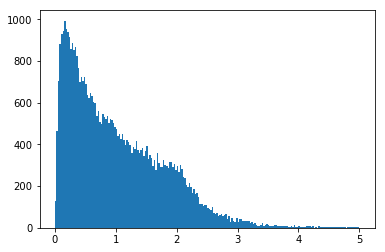

In [90]:

BestFit = np.array(BestFit)
print(np.mean(BestFit[:,0]))
print(np.std(BestFit[:,0]),np.max(BestFit[:,0]))

#for i in range(len(BestFit[:,0])): 
#print(BestFit[2,0])
BestFit = np.array(BestFit)
#BestFit[0:1000,0]
print(np.mean(BestFit[:,0]))
plt.hist(BestFit[:,0],bins=200,range=[0,5])
plt.show()


In [20]:
print(len(finalB))

50093


Mean Effective Temperature in G-J Range 0.0-0.5:  9385.89085072 
Number of Sources:  623 

Mean Effective Temperature in G-J Range 0.5-1.2:  6223.22580645 
Number of Sources:  465 

     G-J [0.0-0.5]                           G-J [0.5-1.2]

    RA                 DEC         DIST      ReducedChisq               RA                DEC         DIST      RedChiSQ
271.16212372     -41.97017167     172.712     1.50932005053          238.30027959     -7.65534154     145.773     0.583320099204
93.2465281     -28.46361115     150.15     0.349595664169          77.88766668     -3.59936093     182.482     1.39972972098
48.75113318     -26.10046057     151.057     1.31634631913          234.06460186     -7.71727492     174.52     0.59781079871
45.2229946     52.35204252     147.71     139.873993835          280.46668795     -39.67516865     119.332     0.640777189727
273.55307709     -39.94978747     191.205     0.208559500945          231.77763686     -40.37868703     186.567     1.87336777679
5

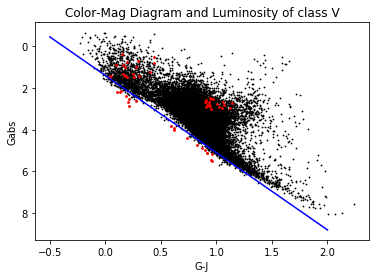

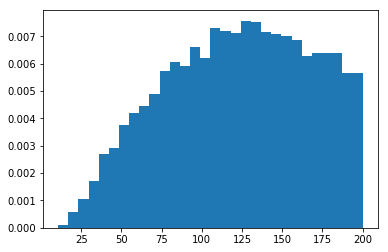

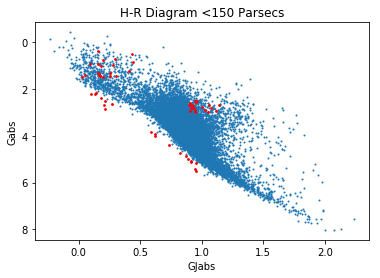

There are:  19641 Stars being used here


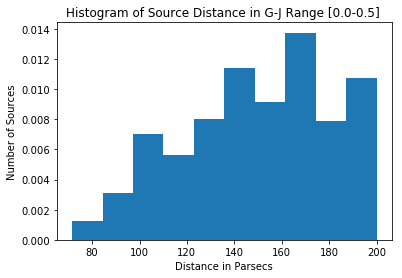

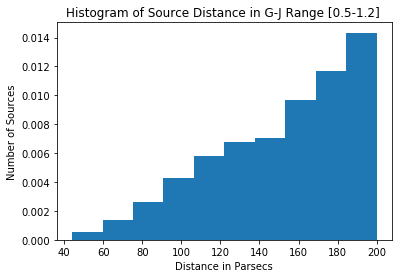

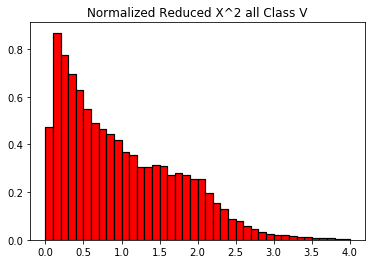

Mean Reduced X^2 value:  1.0813742983 
Standard Deviation:  1.72477333643
Number of Sources:  19641


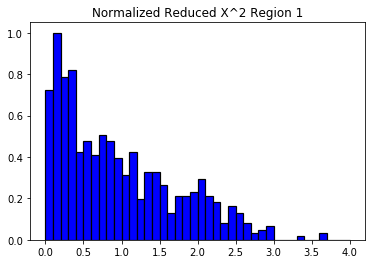

Mean Reduced X^2 value:  1.3498330398 
Standard Deviation:  5.81854741987
Number of Sources:  623 



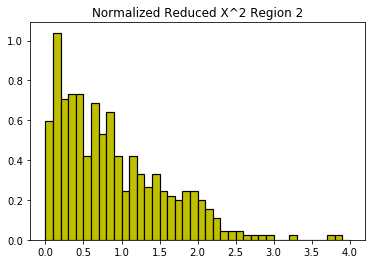

Mean Reduced X^2 value:  1.28485982252 
Standard Deviation:  3.89203343808
Number of Sources:  465 



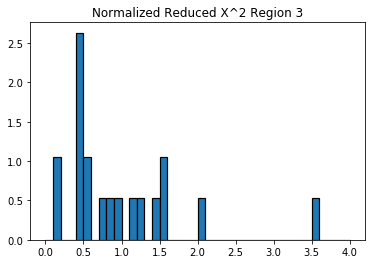

Mean Reduced X^2 value:  1.25839901937 
Standrd Deviation:  1.45717240747
Number of Sources:  20


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


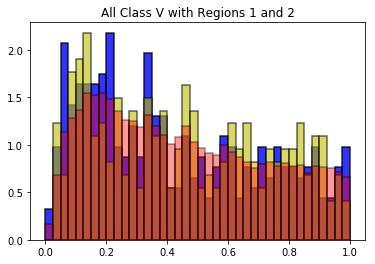

In [102]:
from scipy import stats
RA = t['RAJ2000']
DEC = t['DEJ2000']
Gabs = []
GJabs = []
# First Region represents the G-J range of [0.0-0.5]
# Second Region represents the G-J range of [0.5-1.2]
# Each RA and DEC arrays correspond to each region based on the _"first" or _"second" notation
RA_first = []
DEC_first = []
temp_first = []
RA_second = []
DEC_second = []
temp_second = []
GJ1st = []
G1st = []
GJ2nd = []
G2nd = []
dist_1st = []
dist_2nd = []
# Arrays for sources below Main Sequence Line
RA_below = []
DEC_below = []
G_below = []
GJ_below = []
dist_below = []
temp_below = []
ClassVChi = []
Chi1st = []
Chi2nd = []
ChiBelow = []
nanChi = []
# Defines a rough estimate of the bottom of the Main Sequence Line. 
xrange = np.linspace(-0.5,2.0)
yvalue = xrange*3.7 +1.4
plt.plot(xrange,yvalue,c='b')
count = 0
all_dists = []
region1count = 0
region2count = 0
totalcount = 0
Tdiff = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            count = count + 1
            Gvalue = AbsGmag[i]
            GJvalue = AbsGmag[i]-AbsJmag[i]
            Gabs.append(Gvalue)
            GJabs.append(GJvalue)
            all_dists.append(dist[i])
            totalcount = totalcount + 1
            ClassVChi.append(BestFit[i,0])
            Tdiff.append(np.sqrt((Teff[i]-BestFit[i,1])**2.0))
            if(GJvalue >= 0.0 and GJvalue < 0.5):
                if(Gvalue >= 0.0 and Gvalue <= 1.5):
                    RA_first.append(RA[i])
                    DEC_first.append(DEC[i])
                    temp_first.append(Teff[i])
                    G1st.append(Gvalue)
                    GJ1st.append(GJvalue)
                    dist_1st.append(dist[i])
                    Chi1st.append(BestFit[i,0])
                    region1count = region1count + 1
                    
            if(0.9 <= GJvalue <= 1.2):
                if(2.5 <= Gvalue <= 3.0):
                    RA_second.append(RA[i])
                    DEC_second.append(DEC[i])
                    temp_second.append(Teff[i])
                    G2nd.append(Gvalue)
                    GJ2nd.append(GJvalue)
                    dist_2nd.append(dist[i])
                    Chi2nd.append(BestFit[i,0])
                    region2count = region2count + 1
            if(0.1 <= GJvalue <= 1.0):
                if(Gvalue > GJvalue*3.7+1.6):
                    RA_below.append(RA[i])
                    DEC_below.append(DEC[i])
                    G_below.append(Gvalue)
                    GJ_below.append(GJvalue)
                    dist_below.append(dist[i])
                    temp_below.append(Teff[i])
                    ChiBelow.append(BestFit[i,0])
            #else:
                #nanChi.append(all_RedChi[i])
#              if(0.2 <= GJvalue <= 0.5):
#                  if(Gvalue/GJvalue < 3.7):
#                      RA_below.append(RA[i])
#                      DEC_below.append(DEC[i])
#                      G_below.append(Gvalue)
#                      GJ_below.append(GJvalue)
#                      dist_below.append(dist[i])
#                      temp_below.append(Teff[i])
                
plt.title('Color-Mag Diagram and Luminosity of class V')
plt.xlabel('G-J')
plt.ylabel('Gabs')
plt.gca().invert_yaxis()
plt.scatter(GJabs,Gabs,s=0.6,c='k')
meanTempFirst = np.mean(temp_first)
meanTempSecond = np.mean(temp_second)

Gabs100 = []
GJabs100 = []
GChi = []
GJChi = []

print('Mean Effective Temperature in G-J Range 0.0-0.5: ', meanTempFirst, '\nNumber of Sources: ', len(RA_first), '\n')


print('Mean Effective Temperature in G-J Range 0.5-1.2: ', meanTempSecond, '\nNumber of Sources: ', len(RA_second), '\n')
print('     G-J [0.0-0.5]                           G-J [0.5-1.2]\n')
print('    RA                 DEC         DIST      ReducedChisq               RA                DEC         DIST      RedChiSQ')

G_1st = []
GJ_1st = []
dist1 = []
G_2nd = []
GJ_2nd = []
dist2 = []
for j in range(0,20):
    
    print(RA_first[j], '   ',DEC_first[j], '   ',dist_1st[j],'   ',Chi1st[j], '        ',RA_second[j], '   ',DEC_second[j], '   ',dist_2nd[j],'   ',Chi2nd[j])
    G_1st.append(G1st[j])
    GJ_1st.append(GJ1st[j])
    G_2nd.append(G2nd[j])
    GJ_2nd.append(GJ2nd[j])
    dist1.append(dist_1st[j])
    dist2.append(dist_2nd[j])
distBelow = []
print('\n \nAll Source below Theoretical Main Sequence Line (blue)\n')
print('    RA                 DEC         DIST      Reduced ChiSq')
for j in range(0,len(RA_below)):
    
    print(RA_below[j], '   ',DEC_below[j], '   ',dist_below[j],'   ',ChiBelow[j])
    distBelow.append(dist_below[j])
#     G_1st.append(G1st[j])
#     GJ_1st.append(GJ1st[j])
#     G_2nd.append(G2nd[j])
#     GJ_2nd.append(GJ2nd[j])
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')
plt.show()


classV = []
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            classV.append(dist[i])
pltall=plt.hist(classV,bins=30,normed=True)
plt.show()
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(dist[i] < 150.0):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                Gabs100.append(Gvalue)
                GJabs100.append(GJvalue)
                
for i in range(0,len(Teff)):
    if(SpTypeN[i] == 5.0 and Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            if(BestFit[i,0] < 0.5):
                Gvalue = AbsGmag[i]
                GJvalue = AbsGmag[i]-AbsJmag[i]
                GChi.append(Gvalue)
                GJChi.append(GJvalue)

# plt.title('Red X^2')
# plt.scatter(GJChi,GChi,s=2.0)
# plt.gca().invert_yaxis()
# plt.show()

plt.title('H-R Diagram <150 Parsecs')
plt.xlabel('GJabs')
plt.ylabel('Gabs')
plt.scatter(GJabs100,Gabs100,s=1.0)
plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
plt.scatter(GJ_below,G_below,s=3.0,c='r')

plt.gca().invert_yaxis()
plt.show()
G_Chi = []
GJ_Chi = []
print('There are: ',count, 'Stars being used here')
#print(len(all_RedChi))
averageRedChi = []

# plt.title('H-R With Reduced Chi Sq <10.0')
# plt.xlabel('GJabs')
# plt.ylabel('Gabs')
# plt.scatter(GJ_1st,G_1st,s=3.0,c='r')
# plt.scatter(GJ_2nd,G_2nd,s=3.0,c='r')
# plt.scatter(GJ_below,G_below,s=3.0,c='r')
# plt.scatter(GJ_Chi,G_Chi,s=2.0)
# plt.gca().invert_yaxis()
# plt.show()

plt.title('Histogram of Source Distance in G-J Range [0.0-0.5] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist1st=plt.hist(dist_1st,normed=True)
plt.show()
plt.title('Histogram of Source Distance in G-J Range [0.5-1.2] ')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Number of Sources')
hist2nd=plt.hist(dist_2nd,normed=True)
plt.show()

# Reduced X^2 Normalized Histograms
plt.title('Normalized Reduced X^2 all Class V')
plt.hist(ClassVChi,bins=40,range=[0,4],normed=True,color='r',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(ClassVChi),'\nStandard Deviation: ',np.std(ClassVChi))
print('Number of Sources: ', count)
plt.title('Normalized Reduced X^2 Region 1')
plt.hist(Chi1st,bins=40,range=[0,4],normed=True,color='b',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(Chi1st),'\nStandard Deviation: ',np.std(Chi1st))
print('Number of Sources: ', len(RA_first), '\n')
plt.title('Normalized Reduced X^2 Region 2')
plt.hist(Chi2nd,bins=40,range=[0,4],normed=True,color='y',edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(Chi2nd),'\nStandard Deviation: ',np.std(Chi2nd))
print('Number of Sources: ', len(RA_second), '\n')
plt.title('Normalized Reduced X^2 Region 3')
plt.hist(ChiBelow,bins=40,range=[0,4],normed=True,edgecolor='black',linewidth=1.2)
plt.show()
print('Mean Reduced X^2 value: ',np.mean(ChiBelow),'\nStandrd Deviation: ',np.std(ChiBelow))
print('Number of Sources: ', len(RA_below))
#print(stats.mode(ClassVChi))
plt.title('All Class V with Regions 1 and 2')

plt.hist(Chi1st,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.5,alpha=0.8,color='b')
plt.hist(Chi2nd,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.5,alpha=0.6,color='y')
plt.hist(ClassVChi,bins=40,range=[0,1],normed=True,edgecolor='black',linewidth=1.5,alpha=0.4,color='r')
plt.legend(loc='upper right')
plt.show()


In [6]:
Teff = t['Teff']
classV_temp = []
for i in range(len(Teff)):
    if(SpTypeN[i] == 5.0):
        if(4000 <= Teff[i] <= 10500):
            classV_temp.append(Teff[i])
Spectral_temps = np.unique(classV_temp)
print(len(Spectral_temps),len(Teff),78)
print(np.max(Spectral_temps))

for x in range(len(Spectral_temps)):
    count = 0
    for j in range(len(Teff)):
        if(Teff[j]==Spectral_temps[x]):
            count = count + 1
    print('Temp:',Spectral_temps[x],'Number:',count)

38 50093 78
10500
Temp: 4000 Number: 25
Temp: 4060 Number: 26
Temp: 4200 Number: 94
Temp: 4350 Number: 48
Temp: 4420 Number: 662
Temp: 4590 Number: 30
Temp: 4600 Number: 668
Temp: 4730 Number: 98
Temp: 4750 Number: 3064
Temp: 4900 Number: 1232
Temp: 5080 Number: 155
Temp: 5150 Number: 3938
Temp: 5250 Number: 301
Temp: 5450 Number: 209
Temp: 5570 Number: 637
Temp: 5770 Number: 1619
Temp: 5860 Number: 2560
Temp: 6030 Number: 6324
Temp: 6200 Number: 5665
Temp: 6440 Number: 8426
Temp: 6470 Number: 445
Temp: 6870 Number: 689
Temp: 6890 Number: 4281
Temp: 7150 Number: 320
Temp: 7200 Number: 2025
Temp: 7450 Number: 262
Temp: 7650 Number: 138
Temp: 7850 Number: 684
Temp: 8100 Number: 243
Temp: 8200 Number: 844
Temp: 8600 Number: 265
Temp: 8720 Number: 742
Temp: 8970 Number: 941
Temp: 9000 Number: 176
Temp: 9230 Number: 338
Temp: 9480 Number: 82
Temp: 9520 Number: 882
Temp: 10500 Number: 248


In [7]:

totalRelB_spec = ([])
totalRelV_spec = ([])
totalRelK_spec = ([])
totalRelH_spec = ([])
totalRelJ_spec = ([])
totalRelG_spec = ([])
Bstd_spec = []
Vstd_spec = []
Kstd_spec = []
Hstd_spec = []
Jstd_spec = []
Gstd_spec = []
GKvals = []
for i in range(len(Spectral_temps)):
    sources = 0
    tempRange = []
    GmagV = []
    VmagV = []
    KmagV = []
    HmagV = []
    JmagV = []
    BmagV = []
    Current_temp = Spectral_temps[i]
    for j in range(0,len(Teff)):
        if(SpTypeN[j] in SpV):
            GK = (AbsGmag[j]-AbsKmag[j])
            GKvals.append(GK)
            test = Teff[j]
            if(Teff[j] == Current_temp):
            #if(i <= GK < i+0.25):
                #magRange.append(GK)
                if(Gmag.mask[j] == False):
                    GmagV.append(AbsGmag[j]-AbsGmag[j])
                if(Vmag.mask[j] == False and Gmag.mask[j] == False):
                    VmagV.append(AbsGmag[j]-AbsVmag[j])
                if(Kmag.mask[j] == False and Gmag.mask[j] == False):
                    KmagV.append(AbsGmag[j]-AbsKmag[j])
                if(Hmag.mask[j] == False and Gmag.mask[j] == False):
                    HmagV.append(AbsGmag[j]-AbsHmag[j])
                if(Jmag.mask[j] == False and Gmag.mask[j] == False):
                    JmagV.append(AbsGmag[j]-AbsJmag[j])
                if(Bmag.mask[j] == False and Gmag.mask[j] == False):
                    BmagV.append(AbsGmag[j]-AbsBmag[j])
                sources = sources + 1
            
                
    MeanGmag = np.mean(GmagV)
    MeanVmag = np.mean(VmagV)
    MeanHmag = np.mean(HmagV)
    MeanJmag = np.mean(JmagV)
    MeanKmag = np.mean(KmagV)
    MeanBmag = np.mean(BmagV)
    
    Bstd_spec.append(np.nanstd(BmagV))
    Vstd_spec.append(np.nanstd(VmagV))
    Hstd_spec.append(np.nanstd(HmagV))
    Jstd_spec.append(np.nanstd(JmagV))
    Kstd_spec.append(np.nanstd(KmagV))
    Gstd_spec.append(np.nanstd(GmagV))
    totalRelB_spec.append(MeanBmag)
    totalRelG_spec.append(MeanGmag)
    totalRelV_spec.append(MeanVmag)
    totalRelH_spec.append(MeanHmag)
    totalRelK_spec.append(MeanKmag)
    totalRelJ_spec.append(MeanJmag)
    #print(MeanBmag)
    #Mean_Mags = [MeanBmag,MeanVmag,MeanJmag,MeanHmag,MeanKmag]
    print(Spectral_temps[i],' Range Completed')
    #Mags = [MeanKmag,MeanHmag,MeanJmag,MeanGmag,MeanVmag]
    #plt.xlabel('Effective Wavelength')
#     plt.ylabel('Absolute Magnitude')
#     plt.title('Relative Magnitude SED for '+ str(i)+'-'+ str(i+500) + ' K')
#     plt.scatter(EffWave,Mags)
#     plt.gca().invert_yaxis()
#     plt.show()
print('Finished all',len(Mags),'Templates')

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


4000  Range Completed
4060  Range Completed
4200  Range Completed
4350  Range Completed
4420  Range Completed
4590  Range Completed
4600  Range Completed
4730  Range Completed
4750  Range Completed
4900  Range Completed
5080  Range Completed
5150  Range Completed
5250  Range Completed
5450  Range Completed
5570  Range Completed
5770  Range Completed
5860  Range Completed
6030  Range Completed
6200  Range Completed
6440  Range Completed
6470  Range Completed
6870  Range Completed
6890  Range Completed
7150  Range Completed
7200  Range Completed
7450  Range Completed
7650  Range Completed
7850  Range Completed
8100  Range Completed
8200  Range Completed
8600  Range Completed
8720  Range Completed
8970  Range Completed
9000  Range Completed
9230  Range Completed
9480  Range Completed
9520  Range Completed
10500  Range Completed


NameError: name 'Mags' is not defined

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


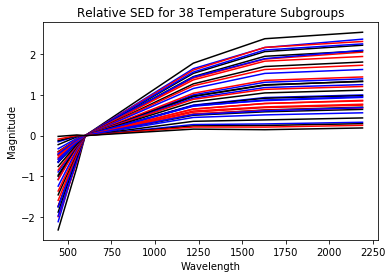

In [80]:
totalRelMags_spec = np.array([totalRelB_spec,totalRelV_spec,totalRelG_spec,totalRelJ_spec,totalRelH_spec,totalRelK_spec])
fig, ax = plt.subplots()
ax.set_color_cycle(['red', 'black', 'blue'])
for i in range(len(Spectral_temps)):
    plt.plot(EffWave,totalRelMags_spec[:,i])
    #plt.legend(["Mean Temp: "], [totalTemp[i]])
plt.title('Relative SED for 38 Temperature Subgroups') 
plt.xlabel('Wavelength')
plt.ylabel('Magnitude')
plt.show()

44.9103 31.1111 36.0409 52.3163


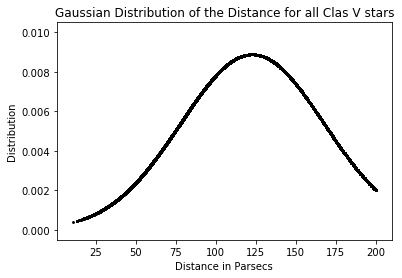

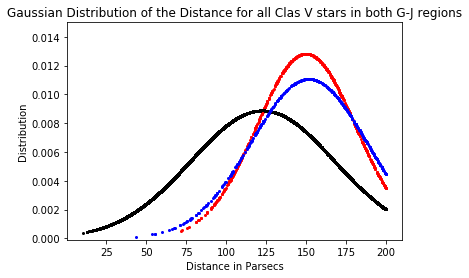

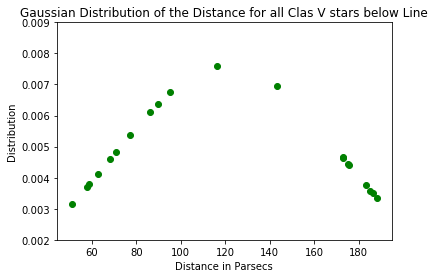

151.645
19641 623 465


In [56]:
#Statistical Analysis of the three regions
def Gauss(x,std,mu):
    value = (1/(np.sqrt(2*np.pi*std**2.0)))*np.exp(-(x-mu)**2.0/(2*std**2.0))
    return value

totalStd = np.std(all_dists)
Std1 = np.std(dist_1st)
Std2 = np.std(dist_2nd)
StdBelow = np.std(dist_below)
print(totalStd,Std1,Std2,StdBelow)
total_Mu = np.mean(all_dists)
Mu_1 = np.mean(dist_1st)
Mu_2 = np.mean(dist_2nd)
Mu_below = np.mean(dist_below)
DistSpreadtotal = []
DistSpread1st = []
DistSpread2nd = []
DistSpreadBelow = []

for i in range(0,len(all_dists)):
    DistSpreadtotal.append(Gauss(all_dists[i],totalStd,total_Mu))
plt.scatter(all_dists,DistSpreadtotal,s=2.0)
axes = plt.gca()
plt.title('Gaussian Distribution of the Distance for all Clas V stars')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Distribution')
plt.scatter(all_dists,DistSpreadtotal,s=3.0,c='k')
axes.set_ylim([-0.0005,0.0105])
plt.show()
for i in range(0,len(dist_1st)):
    DistSpread1st.append(Gauss(dist_1st[i],Std1,Mu_1))
axes = plt.gca()
axes.set_ylim([-0.0001,0.015])
# plt.scatter(dist_1st,DistSpread1st,s=3.0,c=r)
#plt.scatter(all_dists,DistSpreadtotal,s=3.0,c=k)
# plt.scatter(dist_2nd,DistSpread2nd,s=3.0,c=b)
# plt.scatter(dist_below,DistSpreadBelow,s=3.0)
#plt.show()
for i in range(0,len(dist_2nd)):
    DistSpread2nd.append(Gauss(dist_2nd[i],Std2,Mu_2))
axes = plt.gca()
plt.title('Gaussian Distribution of the Distance for all Clas V Stars in region G-J[0.5-1.2]')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Distribution')
#axes.set_ylim([-0.0001,0.015])
#plt.scatter(dist_2nd,DistSpread2nd,s=3.0)
#plt.show()
for i in range(0,len(dist_below)):
    DistSpreadBelow.append(Gauss(dist_below[i],StdBelow,Mu_below))
axes = plt.gca()
#axes.set_ylim([-0.0001,0.015])
#plt.scatter(dist_below,DistSpreadBelow,s=3.0)
#plt.show()
axes = plt.gca()
axes.set_ylim([-0.0001,0.015])
plt.title('Gaussian Distribution of the Distance for all Clas V stars in both G-J regions')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Distribution')
plt.scatter(dist_1st,DistSpread1st,s=4.0,c='r')
plt.scatter(all_dists,DistSpreadtotal,s=4.0,c='k')
plt.scatter(dist_2nd,DistSpread2nd,s=4.0,c='b')
#plt.scatter(dist_below,DistSpreadBelow,c='g')
plt.show()
# plt.scatter(dist_1st,DistSpread1st,s=3.0,c='r')
# plt.scatter(all_dists,DistSpreadtotal,s=3.0,c='k')
# plt.scatter(dist_2nd,DistSpread2nd,s=3.0,c='b')
#plt.scatter(dist_below,DistSpreadBelow,c='g')
#plt.show()
#plt.scatter(dist_1st,DistSpread1st,s=3.0,c='r')
#plt.scatter(all_dists,DistSpreadtotal,s=3.0,c='k')
#plt.scatter(dist_2nd,DistSpread2nd,s=3.0,c='b')
plt.title('Gaussian Distribution of the Distance for all Clas V stars below Line')
plt.xlabel('Distance in Parsecs')
plt.ylabel('Distribution')
axes = plt.gca()
axes.set_ylim([0.002,0.009])
plt.scatter(dist_below,DistSpreadBelow,c='g')
plt.show()
print(Mu_2)
print(totalcount,region1count,region2count)

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Warning: converting a masked element to nan.
  """Entry point for launching an IPython kernel.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


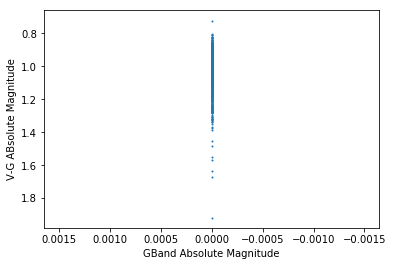

6
nan


In [52]:
VmG = np.array(JmagV) - np.array(GmagV)
plt.xlabel('GBand Absolute Magnitude')
plt.ylabel('V-G ABsolute Magnitude')
plt.scatter(GmagV,VmG,s=1.0)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

print(len(Mags))
print((MeanGmag))

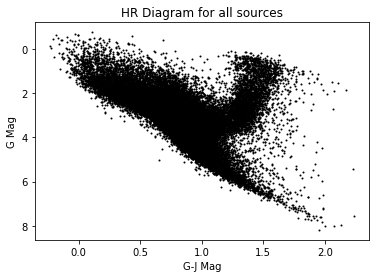

In [43]:
count = 0
Gabs = []
GJabs = []
for i in range(0,len(Teff)):
    if(Gmag.mask[i] == False and Jmag.mask[i] == False and Kmag.mask[i] == False and Hmag.mask[i] == False):
        
        if(Jmag.mask[i] == False and Gmag.mask[i] == False and Bmag.mask[i] == False):
            count = count + 1
            Gvalue = AbsGmag[i]
            GJvalue = AbsGmag[i]-AbsJmag[i]
            Gabs.append(Gvalue)
            GJabs.append(GJvalue)
            #all_dist.append(dist[i])
plt.title('HR Diagram for all sources')
plt.xlabel('G-J Mag')
plt.ylabel('G Mag')
plt.gca().invert_yaxis()
plt.scatter(GJabs,Gabs,s=1.0,c='k')
plt.show()